# Stat 5650
## Statistical Learning and Data Mining I
## Homework #1
### Due: Wednesday, January 29.
The purpose of this homework is to get you comfortable using R to carry out basic matrix and
vector calculations.
The turtle data contains measurements (length, width, height) on male and female turtles of the
same species. If you are familiar with SAS but not R, you can check many of the calculations in
SAS but please do the calculations in R.


1. Graphically summarize the distributions of the three variables using boxplots, histograms,
and normal quantile plots. Do the summaries for the combined data and for each gender of
turtle.

In [1]:
turtles <- read.csv("../../Data/turtles.csv")

In [2]:
males <- turtles[turtles$Gender == 'male', 1:3]
females <- turtles[turtles$Gender == 'female', 1:3]

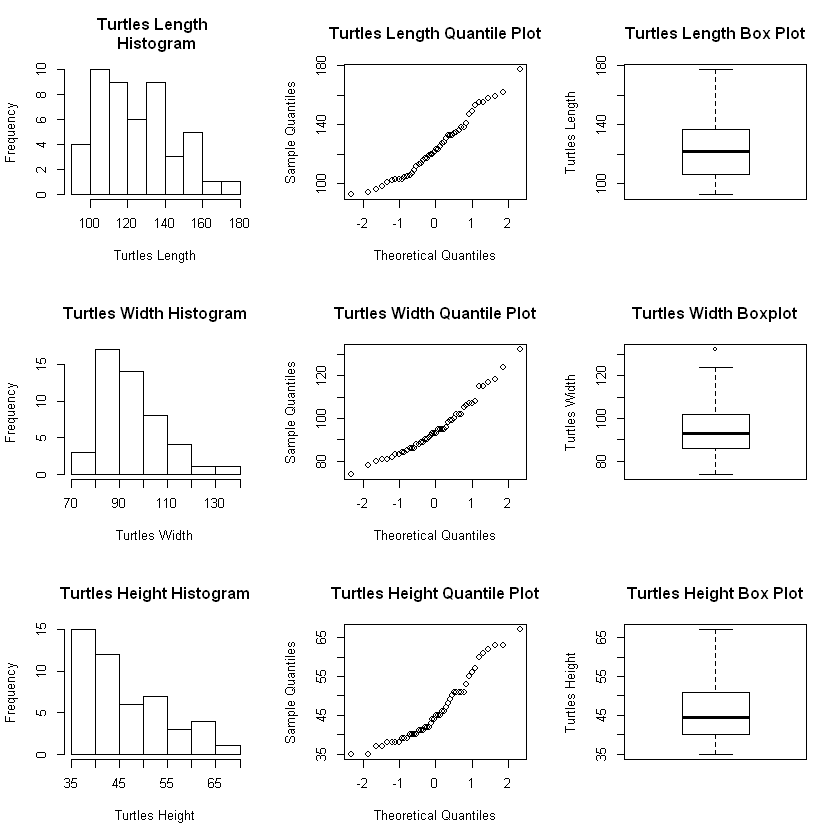

In [4]:
par(mfrow=c(3,3))
hist(turtles$Length,
     main = 'Turtles Length \n Histogram',
     xlab = 'Turtles Length')
qqnorm(turtles$Length,
       main = 'Turtles Length Quantile Plot')
boxplot(turtles$Length,
        main = 'Turtles Length Box Plot',
        ylab = 'Turtles Length')
hist(turtles$Width,
     main = 'Turtles Width Histogram',
     xlab = 'Turtles Width')
qqnorm(turtles$Width,
       main = 'Turtles Width Quantile Plot')
boxplot(turtles$Width,
        main = 'Turtles Width Boxplot',
        ylab = 'Turtles Width')
hist(turtles$Height,
     main = 'Turtles Height Histogram',
     xlab = 'Turtles Height')
qqnorm(turtles$Height,
       main = 'Turtles Height Quantile Plot')
boxplot(turtles$Height,
        main = 'Turtles Height Box Plot',
        ylab = 'Turtles Height')

The combined turtle data is pretty close to normal. We can see some skewness in the height of the turtle. The histogram is shifted heavily to the left for height and the quantile plot dips down a little. The Box plot is also pushed down towards the bottom. But looking at the length and the width we can see that those two are pretty normal.

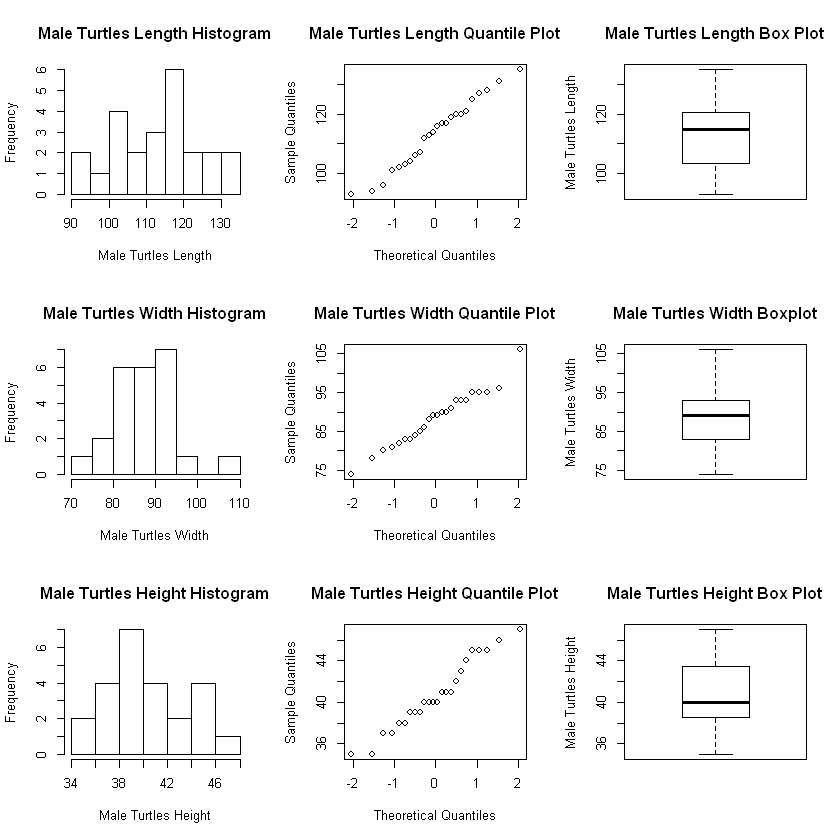

In [8]:
par(mfrow=c(3,3))
hist(males$Length,
     main = 'Male Turtles Length Histogram',
     xlab = 'Male Turtles Length')
qqnorm(males$Length,
       main = 'Male Turtles Length Quantile Plot')
boxplot(males$Length,
        main = 'Male Turtles Length Box Plot',
        ylab = 'Male Turtles Length')
hist(males$Width,
     main = 'Male Turtles Width Histogram',
     xlab = 'Male Turtles Width')
qqnorm(males$Width,
       main = 'Male Turtles Width Quantile Plot')
boxplot(males$Width,
        main = 'Male Turtles Width Boxplot',
        ylab = 'Male Turtles Width')
hist(males$Height,
     main = 'Male Turtles Height Histogram',
     xlab = 'Male Turtles Height')
qqnorm(males$Height,
       main = 'Male Turtles Height Quantile Plot')
boxplot(males$Height,
        main = 'Male Turtles Height Box Plot',
        ylab = 'Male Turtles Height')

Looking at just the male turtle data. The plots appear to be close to normal across the length, width and height. They do differ slightly in some areas but they are close enough to normal to match up.

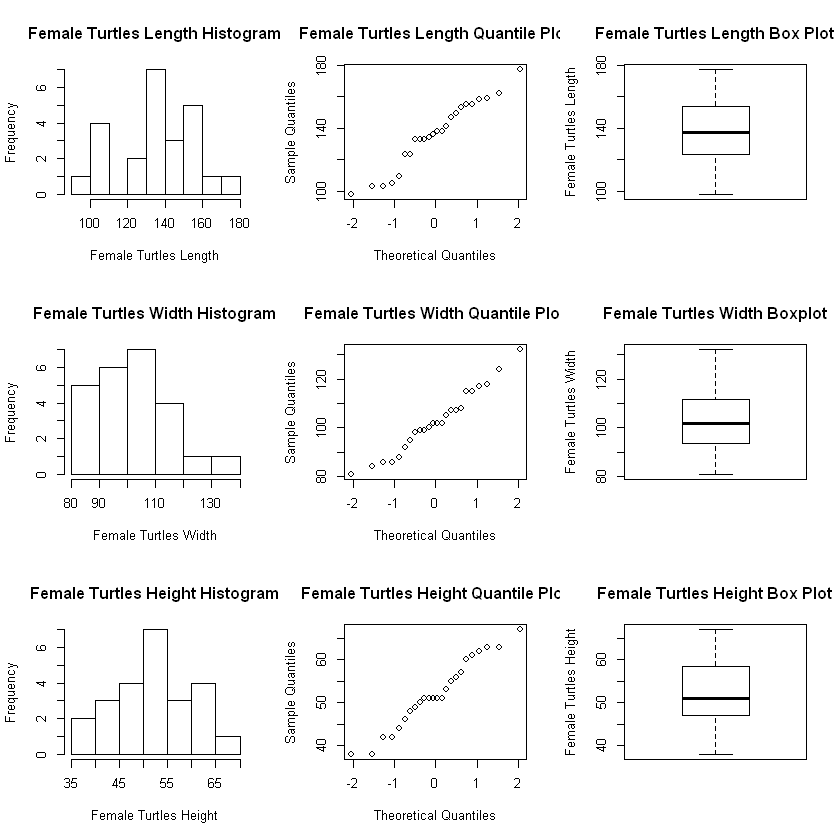

In [9]:
par(mfrow=c(3,3))
hist(females$Length,
     main = 'Female Turtles Length \n Histogram',
     xlab = 'Female Turtles Length')
qqnorm(females$Length,
       main = 'Female Turtles Length Quantile Plot')
boxplot(females$Length,
        main = 'Female Turtles Length Box Plot',
        ylab = 'Female Turtles Length')
hist(females$Width,
     main = 'Female Turtles Width Histogram',
     xlab = 'Female Turtles Width')
qqnorm(females$Width,
       main = 'Female Turtles Width Quantile Plot')
boxplot(females$Width,
        main = 'Female Turtles Width Boxplot',
        ylab = 'Female Turtles Width')
hist(females$Height,
     main = 'Female Turtles Height Histogram',
     xlab = 'Female Turtles Height')
qqnorm(females$Height,
       main = 'Female Turtles Height Quantile Plot')
boxplot(females$Height,
        main = 'Female Turtles Height Box Plot',
        ylab = 'Female Turtles Height')

The female turtle data is also approximately normal as well. The female length does appear to vary a little in the histogram and the quantile plot. But the box plot appears to be normally distributed.

2. Compute the covariance matrices and the correlation matrices for the male and female turtles,
and visually compare them. (Later we will determine how to formally compare covariance
matrices and mean vectors for different groups.)

In [10]:
males.cov <- cov(males)
females.cov <- cov(females)
print('Male Covariance Matrix')
males.cov
print('Female Covariance Matrix')
females.cov

[1] "Male Covariance Matrix"


,Length,Width,Height
Length,138.76630,79.14674,37.37500
Width,79.14674,50.04167,21.65399
Height,37.37500,21.65399,11.25906


[1] "Female Covariance Matrix"


,Length,Width,Height
Length,451.5199,270.9746,165.95471
Width,270.9746,171.7319,101.84420
Height,165.9547,101.8442,64.73732


Looking at the covariance matrices for male and female turtles. We can see that they all have an increasing linear relationship. The covariance values for female turtles is much greater than that for male turtles. But generally you will just use covariance to determine whether the variables have a positive linear relationship or a negative linear relationship.

In [11]:
males.cor <- cor(males)
females.cor <- cor(females)
print('Male Correlation Matrix')
males.cor
print('Female Correlation Matrix')
females.cor

[1] "Male Correlation Matrix"


,Length,Width,Height
Length,1.0000000,0.9497846,0.9455580
Width,0.9497846,1.0000000,0.9122648
Height,0.9455580,0.9122648,1.0000000


[1] "Female Correlation Matrix"


,Length,Width,Height
Length,1.0000000,0.9731162,0.9706748
Width,0.9731162,1.0000000,0.9659029
Height,0.9706748,0.9659029,1.0000000


The correlation matrices for females and males show that all of the variables are positively correlated and that they have very strong correlation between them. The correlation values do show greater strength among the female turtles. But the male turtles are still close behind them.

3. For one of the genders, compute the matrix $T = \frac{1}{n-1} (\mathbf{Y}^T \mathbf{Y} - n \mathbf{\bar{y}} \mathbf{\bar{y}}^T)$ and compare it with the covariance matrix you previously obtained.

Teacher Notes:
$\bar{y}$ = The mean of each column

What to put into code
$\bar{y}$%*%t($\bar{y}$)

R code = ybar = apply(datamatrix, 2, mean)

In two and three output the matrix

In [5]:
n <- nrow(males)
m_males <- as.matrix(males)
ybar = apply(m_males, 2, mean)

print('Matrix Computed Manually')
(n-1)^-1*((t(m_males)%*%m_males)-(n*ybar%*%t(ybar)))
print('Matrix Computed with cov() function')
males.cov

[1] "Matrix Computed Manually"


,Length,Width,Height
Length,138.76630,79.14674,37.37500
Width,79.14674,50.04167,21.65399
Height,37.37500,21.65399,11.25906


[1] "Matrix Computed with cov() function"


ERROR: Error in eval(expr, envir, enclos): object 'males.cov' not found


In [20]:
# k <- ncol(males)
# n <- nrow(males)
# m_males <- as.matrix(males)

# #create means for each column
# M_mean <- matrix(data=1, nrow=n) %*% cbind(mean(males$Length),mean(males$Width),mean(males$Height))

# # creates a difference matrix
# D <- m_males - M_mean

# # creates the covariance matrix
# (n-1)^-1 * (t(D) %*% D)
# males.cov

Whether you compute the covariance matrix with the given formula or with the built in function in R
you get the same results.

[Covariance Matrix Calculation](https://datascienceplus.com/understanding-the-covariance-matrix/)

4. For one of the covariance matrices, compute the eigenvalues and eigenvectors of the inverse
of the covariance matrix. What is the relationship between the eigenvalues and eigenvectors
of a covariance matrix and its inverse?

In [9]:
inv.males.cov <- solve(males.cov)
inv.males.eig <- eigen(inv.males.cov)
inv.males.eig$values
inv.males.eig$vectors

[1] 0.905934472 0.271108226 0.005120993

0.23653541,0.48810477,0.8401219
0.04687583,-0.86938426,0.4919082
-0.97049145,0.07697229,0.2285205


In [10]:
males.eig <- eigen(males.cov)
males.eig$values
males.eig$vectors

[1] 195.274633   3.688564   1.103833

0.8401219,0.48810477,-0.23653541
0.4919082,-0.86938426,-0.04687583
0.2285205,0.07697229,0.97049145


The eigenvalues of the inverse are just the reciprocals of the normal covariance matrix. So 1/195 should give you the eigen value of the inverse. The sign doesn't matter but the eigenvectors will be the same for the inverse just in different positions in the matrix. Since 195 is the largest eigenvalue of the normal matrix. 1/195 makes it the smallest eigenvalue of the inverse matrix.

[1] 0.005120993

5. Letting $\mathbf{u_1}$ denote the eigenvector corresponding to the largest eigenvalue, $\lambda_1$ . Verify
that $\mathbf{Su_1} = \lambda_1 \mathbf{u}_1$ and $\mathbf{u}_1^T \mathbf{Su_1} = \lambda_1$.

In [18]:
S <- males.cov
u1 <- males.eig$vector[,1]
lam1 <- males.eig$values[1]
u1%*%S
lam1 %*%u1

Length,Width,Height
164.0545,96.05719,44.62425


164.0545,96.05719,44.62425


The first equation is the covariance matrix $\mathbf{S}$ times by the vector $u_1$. Below this is $\lambda_1 \mathbf{u_1}$ This shows that those two equations equal one another.

In [24]:
u1t <- t(u1)
f <- u1t%*%S%*%u1
f
lam1
lam1 == f


195.2746


[1] 195.2746

TRUE


This shows us that the two equations do equal one another.

6. The length, width, and height are all measured in the same units. Is there any reason we
might prefer to use the correlation matrices over the covariance matrices if we were to carry
out principal components analysis on this data?

Answer: Because the variances of the variables differ greatly from one another the correlatin matrix would be a good choice because it would standardize the values for the principal component analysis.

Notes:
 "In addition, even variables measured using the same scale can have very different variances and this too creates problems for principal component analysis. Using the correlation matrix eliminates this problem also." [Source](https://www.researchgate.net/post/What_is_the_appropriate_matrix_covariance_or_correlation_in_principal_component_analysis)

7. Compute the eigenvalues and eigenvectors for the covariance and the correlation matrix for
one of the genders of turtle, and compare the eigenvectors. In each case, how many
principal components would you recommend retaining?

In [27]:
female.cov.eig <- eigen(females.cov)
female.cor.eig <- eigen(females.cor)

female.cov.eig$values
female.cov.eig$vectors

female.cor.eig$values
female.cor.eig$vectors

[1] 678.365651   6.769697   2.853783

0.8138808,0.5548963,-0.1723025
0.4961059,-0.8180268,-0.2910518
0.3024516,-0.1514012,0.9410636


[1] 2.93979909 0.03433769 0.02586323

-0.5781417,-0.1373949,0.8042853
-0.5771970,-0.6278484,-0.5221591
-0.5767112,0.7661129,-0.2836814


Based on the eigenvalues I would recommend retaining the first principal component in both instances. Then going in and comparing their eigenvectors with the covariance matrix. The Length of the turtle is weighted as having the biggest effect on the first principle component. In the correlation matrix all of the variables are weighted pretty evenly in the first principle component.

How many principal components would you recommend retaing?

From class I think I remember that when we look at the eigenvectors it is telling us how much they have to do with the response variable.

NOT PART OF THE HOMEWORK

In [28]:
55/59

[1] 0.9322034

In [29]:
6.15+6.66+6.208+5.75+4.905+3.96+2.83+2.53+3.159+4.075+6.436+6.4377

[1] 59.1007

In [3]:
x<- 11.101+0.8312+0.049445+ 0.0090129+ 0.0055803+0.0014389+0.0008611+0.0005360+0.0003859+0.0002023+0.0001305+0.0001117
11.101/x

[1] 0.9250907